In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the movies dataset
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(10329, 3)

**<font size="5">The dataset has 10329 rows and 3 columns.</font>**

In [4]:
#Loading the ratings dataset
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
ratings.shape

(105339, 4)

**<font size="5">The dataset has 105339 rows and 4 columns.</font>**

**<font size="15">Exploratory Data Analysis.</font>**

In [6]:
#Checking info of movies dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [8]:
#Checking for null values
pd.DataFrame({'Count': movies.isnull().sum(), 'Percentage': movies.isnull().sum()/len(movies)})

,Count,Percentage
movieId,0,0.0
title,0,0.0
genres,0,0.0


**<font size="5">There is no null values in the dataset.</font>** 

In [11]:
#Statistical summary for categorical values
movies.describe(include="O")

,title,genres
count,10329,10329
unique,10327,938
top,Men with Guns (1997),Drama
freq,2,1385


In [7]:
#Checking info of ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [13]:
#Checking for null values
pd.DataFrame({'Count': ratings.isnull().sum(), 'Percentage': ratings.isnull().sum()/len(ratings)})

,Count,Percentage
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


**<font size="5">There is no null values in the dataset.</font>**

In [14]:
#Statistical summary for numerical values
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


**<font size="7">Merging the two dataset.</font>**

In [21]:
cinemas = pd.merge(movies,ratings,on="movieId")
cinemas.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [22]:
#Checking for null values
pd.DataFrame({'Count': cinemas.isnull().sum(), 'Percentage': cinemas.isnull().sum()/len(cinemas)})

,Count,Percentage
movieId,0,0.0
title,0,0.0
genres,0,0.0
userId,0,0.0
rating,0,0.0
timestamp,0,0.0


**<font size="5">There is no null values in the dataset.</font>**

In [29]:
#creating a ratings df
ratings_df=pd.DataFrame(cinemas.groupby("title")["rating"].mean())
ratings_df["No. of ratings"]=cinemas.groupby("title")["rating"].count()
ratings_df=ratings_df.reset_index()
ratings_df.head()

,title,rating,No. of ratings
0,'71 (2014),3.500,1
1,'Hellboy': The Seeds of Creation (2004),3.000,1
2,'Round Midnight (1986),2.500,1
3,'Til There Was You (1997),4.000,3
4,"'burbs, The (1989)",3.125,20


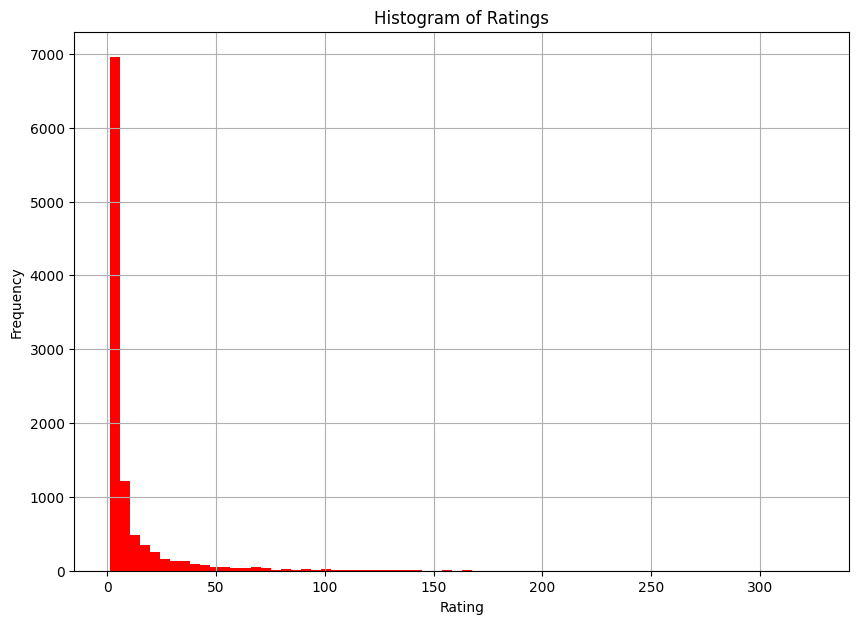

In [43]:
#Plotting the graph for 'No. of ratings' column

#Set the fig size
plt.figure(figsize=(10,7))

#Plotting histogram
ratings_df['No. of ratings'].hist(bins = 70, color = 'red') 

#Plotting title
plt.title('Histogram of Ratings')

#Plotting labels
plt.xlabel('Rating')
plt.ylabel('Frequency')

#Printing the graph
plt.show()

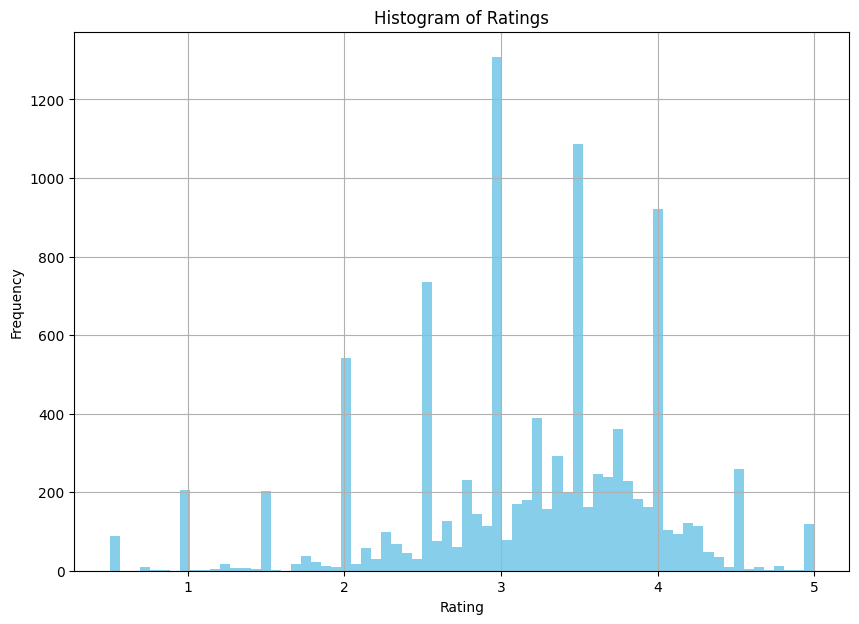

In [45]:
#Plotting the graph for 'ratings' columns 

#Set the fig size
plt.figure(figsize=(10,7))

#Plotting histogram
ratings_df['rating'].hist(bins = 70, color = 'skyblue')

#Plotting title
plt.title('Histogram of Ratings')

#Plotting labels
plt.xlabel('Rating')
plt.ylabel('Frequency')

#Printing the graph
plt.show()

In [46]:
#Expanding genres of movies
genre_expanded = cinemas.set_index('title')['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).reset_index()
genre_expanded.columns=["title","genres"]
print(genre_expanded)

                                      title              genres
0                          Toy Story (1995)           Adventure
1                          Toy Story (1995)           Animation
2                          Toy Story (1995)            Children
3                          Toy Story (1995)              Comedy
4                          Toy Story (1995)             Fantasy
...                                     ...                 ...
281899       A Very Murray Christmas (2015)              Comedy
281900                 The Big Short (2015)               Drama
281901                 The Big Short (2015)               Drama
281902                 The Big Short (2015)               Drama
281903  Marco Polo: One Hundred Eyes (2015)  (no genres listed)

[281904 rows x 2 columns]


**<font size="15">Recommender System 1</font>**

In [49]:
#Creating binary matrix of movies title and genres
binary_matrix = pd.DataFrame(genre_expanded.pivot_table(index='title', columns='genres', aggfunc='size', fill_value=0))
binary_matrix

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
'71 (2014),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0
"'burbs, The (1989)",0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
xXx (2002),0,24,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,24,0,0
xXx: State of the Union (2005),0,7,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7,0,0


In [51]:
#Defining model 1 input
Input_genre=input("Entre genre: ")
Input_reviews=int(input("Enter Minimum Reviews Threshold: "))
Input_recommendations=int(input("Enter No. of Recommendations you want: "))                  

#Getting movie titles having same genre
similar_genre=binary_matrix[binary_matrix[Input_genre]!=0]

#Merging same genre movies with rating df to get their corresponding average number of ratings 
similar_genre_rating=pd.merge(similar_genre,ratings_df[["title","No. of ratings"]],on="title",how="inner")

#Merging same genre movies with rating df to get their corresponding average ratings 
similar_genre_rating=pd.merge(similar_genre_rating,ratings_df[["title","rating"]],on="title",how="inner")

similar_genre_rating=similar_genre_rating[["title","rating","No. of ratings"]]
similar_genre_rating=similar_genre_rating.reset_index(drop=True)
print("="*70)
pd.DataFrame(similar_genre_rating[similar_genre_rating["No. of ratings"]>Input_reviews].sort_values("rating",ascending=False).head(Input_recommendations))

Entre genre:  Adventure
Enter Minimum Reviews Threshold:  200
Enter No. of Recommendations you want:  50


,title,rating,No. of ratings
972,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
828,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
971,Star Wars: Episode IV - A New Hope (1977),4.188645,273
973,Star Wars: Episode VI - Return of the Jedi (1983),4.031532,222
100,Back to the Future (1985),3.943662,213
1069,Toy Story (1995),3.907328,232
250,Dances with Wolves (1990),3.766169,201
544,Jurassic Park (1993),3.659864,294
500,Independence Day (a.k.a. ID4) (1996),3.370732,205


**<font size="15">Recommender System 2</font>**

In [52]:
#Creating binary matrix of genres and movie title
binary_matrix_1 = genre_expanded.pivot_table(index='genres', columns='title', aggfunc='size', fill_value=0)

#Converting counts to binary
binary_matrix_1 = (binary_matrix_1 > 0).astype(int)
binary_matrix_1.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
genres,,,,,,,,,,,,,,,,,,,,,
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
Adventure,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Children,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#Defining inputs for 2nd model
Input_movie=input("Enter Movie Title: ")
Input_recommend=int(input("Enter Preferred No. of Recommendations: "))

#Getting the genres of the input movie
movie_genres=binary_matrix_1[Input_movie]

#Getting movies  with similar genre to the input movie
similar_to_movie=binary_matrix_1.corrwith(movie_genres)

#Creating the Dataframe & Sorting the values
corr_movie=pd.DataFrame(similar_to_movie, columns=["genre_corr"])
corr_movie=corr_movie.reset_index()
corr_movie=corr_movie.sort_values(by="genre_corr", ascending=False)

print("="*60)
corr_movie["title"].head(Input_recommend)

Enter Movie Title:  Finding Nemo (2003)
Enter Preferred No. of Recommendations:  10


4485                       Ice Age 2: The Meltdown (2006)
4484                                       Ice Age (2002)
6967                        Penguins of Madagascar (2014)
4773                              Jack-Jack Attack (2005)
5653                                    Madagascar (2005)
7065    Pinchcliffe Grand Prix (Flåklypa Grand Prix) (...
4843                     Jimmy Neutron: Boy Genius (2001)
7088                 Pirates! Band of Misfits, The (2012)
6826                                Over the Hedge (2006)
1503                                 Bug's Life, A (1998)
Name: title, dtype: object

**<font size="15">Recommender System 3</font>**

In [57]:
#Matching similar users by movie rating
usermatched=cinemas.pivot_table(index="title",columns="userId",values="rating")
usermatched.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Defining model 3 input
Id_input=int(input("Enter user Id"))
recom_num=int(input("Enter No. of recommendations"))
threshold=int(input("Enter Threshold for similar users"))

#Checking for rating pattern of input userId
Id_rating=usermatched[Id_input]

#Checking users with similar rating pattern to input user
similar_to_Idinput= usermatched.corrwith(Id_rating)
similar_to_Idinput=pd.DataFrame(similar_to_Idinput, columns=["userId_corr"])
similar_to_Idinput=similar_to_Idinput.dropna()#.reset_index()

#Merging similar userId to movies they rated
similar_to_Idinput=pd.merge(similar_to_Idinput,cinemas[["userId","title"]],on="userId",how="inner")
similar_to_Idinput=similar_to_Idinput.sort_values("userId_corr", ascending =False).head(threshold)

#output movies with similar userId to input user

print("="*60)
similar_to_Idinput["title"].head(recom_num)

Enter user Id 300
Enter No. of recommendations 10
Enter Threshold for similar users 100


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


38124           Courage Under Fire (1996)
38125                        Faces (1968)
38126                 Multiplicity (1996)
38127             Escape from L.A. (1996)
38128             Harold and Maude (1971)
38129                    Manhattan (1979)
38130                       Patton (1970)
38131                 Lost Highway (1997)
38132                  Wild Things (1998)
32696    Island of Dr. Moreau, The (1996)
Name: title, dtype: object

**<font size="6">Thank You</font>**